Example is taken from the Github readme: https://github.com/yi-jia-li/cue

In [1]:
from cue.line import predict as line_predict
from cue.continuum import predict as cont_predict
par = [[21.5, 14.85, 6.45, 3.15, 4.55, 0.7, 0.85, 49.58, 10**2.5, -0.85, -0.134, -0.134],
       [21.5, 14.85, 6.45, 3.15, 4.55, 0.7, 0.85, 49.58, 10**2.5, -0.85, -0.134, -0.134]]
#lines = line_predict(theta=par).nn_predict()
#cont = cont_predict(theta=par).nn_predict()
#print(cont)

2024-12-11 15:15:37.394821: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 15:15:37.399319: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 15:15:37.408803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733926537.422727  509230 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733926537.426796  509230 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 15:15:37.444234: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
from jax.experimental import jax2tf
import jax.numpy as jnp
import tensorflow as tf
import jax

def continuum_tf(theta):
    return cont_predict(theta=theta).nn_predict()

par = jnp.array(par)
wavelength_cont, continuum = jax2tf.call_tf(continuum_tf)(par)

print(wavelength_cont)
print(continuum)

[9.150e+02 9.250e+02 9.350e+02 ... 9.817e+07 9.908e+07 1.000e+08]
[[8.0352510e+21 8.0000148e+21 7.9655071e+21 ... 4.7587019e+23
  4.7641613e+23 4.7696813e+23]
 [8.0352510e+21 8.0000148e+21 7.9655071e+21 ... 4.7587019e+23
  4.7641613e+23 4.7696813e+23]]


In [3]:
def lines_tf(theta):
    return line_predict(theta=theta).nn_predict()

par = jnp.array(par)
wavelength_lines, lines = jax2tf.call_tf(lines_tf)(par)

print(wavelength_lines.shape)
print(lines.shape)

(138,)
(2, 138)


/home/annalena/miniconda3/envs/jaxcue/lib/python3.11/site-packages/tensorflow/python/framework/constant_op.py:108: RuntimeWarning: overflow encountered in cast
  return ops.EagerTensor(value, ctx.device_name, dtype)


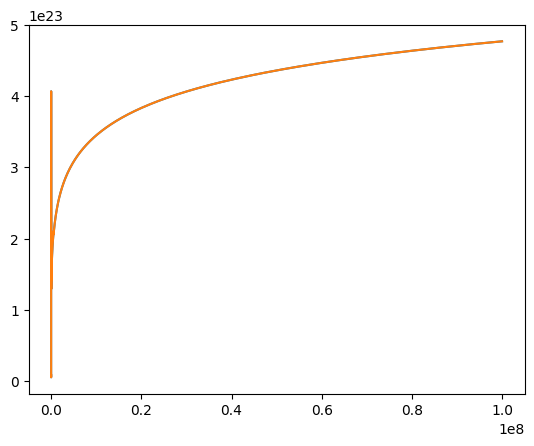

In [4]:
import matplotlib.pyplot as plt

plt.plot(wavelength_cont, continuum[0])
plt.plot(wavelength_cont, continuum[1])
plt.show()